<h1>Indonesian Police Departement Sentiment Analysis</h1>

<p>In this notebook, I'm gonna do sentiment analysis to know what people actually think of the Indonesian Police Departement in the last 3 years</p>

<p>@syahrulmwijaya</p>

<h3>Import library</h3>

<p>Before going too far, we need to import all the libraries first</p>

In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#library to do the scraping
import snscrape.modules.twitter as sntwitter
from tqdm.notebook import tqdm

#clear warning message to make the notebook looks clear
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

<p>most of the libraries above is a "normal" library on data analysys task except for the snscrape that used to do the data scrape task and warnings to ignore (disable) the warnings notification that I personally found it annoying</p>

<h3>Scrape The Data<h3>

<p>The data I'm gonna use down here is the scraped data that i got from Twitter. Maybe some of you guys asking "why Twitter?", the reason why I took twitter to be the subject is because Twitter still widely used in Indonesia to spill out their thought on anything, including about the police depertement</p>

In [66]:
tweets_list = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in tqdm(
    enumerate(
        sntwitter.TwitterSearchScraper(
            f"kinerja polisi since:2020-01-01 until:2022-12-30"
        ).get_items()
    ),
    total=12_000,
):  # declare a username
    if i > 12_000:  # number of tweets you want to scrape
        break
    tweets_list.append(
        [tweet.date, tweet.id, tweet.content, tweet.user.username]
    )  # declare the attributes to be returned
# Creating a dataframe from the tweets list above
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/12000 [00:00<?, ?it/s]

<p>The tweets we're gonna scrape is between 2020-01-01 until 2022-12-30 with the keyword "kinerja polisi" 
 And bellow here is some example of the scraped tweets I got from Twitter"</p>

In [67]:
tweet_df.head(10)

,Datetime,Tweet Id,Text,Username
0,2022-12-29 13:20:01+00:00,1608452783363231746,"Akhiri 2022, Kapolda Jateng Mohon Maaf jika Ki...",GATRA_com
1,2022-12-29 12:10:00+00:00,1608435161426984962,"Gelar Konferensi Pers, Berikut Capaian Kinerja...",TerentangPolisi
2,2022-12-28 23:54:24+00:00,1608250040610607107,"@NarasiNewsroom polisi kontol, yang lu benerin...",Malvin4you
3,2022-12-28 12:53:47+00:00,1608083791117180930,"Dialog papa Al ""Polisi ngk bisa nyari!!!!"" Lah...",NasirChya
4,2022-12-27 14:44:05+00:00,1607749160824111105,Pertahankan pencapaian Terbaik Melayani Masyar...,NumberthreeT
5,2022-12-27 14:40:20+00:00,1607748219609714688,Terbaik Melayani Masyarakat di musim liburan t...,Lollycat_Images
6,2022-12-27 08:57:00+00:00,1607661813927411713,terbukti kinerja polri memang baik. terimakasi...,balabalaa45
7,2022-12-27 07:30:30+00:00,1607640047502725120,Semangat Pak polisi. Kalian memang hebat. Semo...,yolsdelweiss
8,2022-12-27 03:39:04+00:00,1607581807415029760,"POLISI TIDAK SEMUANYA BAJINGAN, HANYA KARENA S...",MissMegha1717
9,2022-12-26 15:53:41+00:00,1607404290037133316,@Harian_Jogja Gaji fantastis tapi sayang gak d...,paidjo_slebor


<p>From the example ebove we can see that the scraped tweets are completly random, and here is the reason why we do sentiment analysis, is to know whether the people satisfied with the Indonesian police department or not</p>

<h3>Model Classifier</h3>

<p>The model down here is form the huggingface.co to cut the time used in this analysis</p>

In [68]:
from transformers import pipeline

model = f"w11wo/indonesian-roberta-base-sentiment-classifier"
sentiment_task = nlp = pipeline(
    "sentiment-analysis",
    model=model,
    tokenizer=model
)

sentiment_task("Jangan sampai saya telpon bos saya ya!")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at w11wo/indonesian-roberta-base-sentiment-classifier.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


[{'label': 'negative', 'score': 0.9987142086029053}]

<p>From the example word above we can see that the model has been successfully classify whether the words given is negative or positive, and next we just have to try the model with scraped tweets sample</p>

In [138]:
tweet_df['Text'][9]

'@Harian_Jogja Gaji fantastis tapi sayang gak di imbangi dengan kinerja yg baik,\nYg ada justru citra polisi yg smakin buruk,'

In [139]:
sentiment_task(tweet_df['Text'][9])

[{'label': 'negative', 'score': 0.9959805011749268}]

<p>From the scaped tweet sample above we can see that the model has clearly give a good class to label whether a tweet have negative tendention or not</p>

<h3>Classifying Process</h3>

<p>Classifying process is where the model is used to label all the tweets sentiment</p>

In [71]:
sentt = pd.DataFrame()

for i in range(len(tweet_df)):
    sentti=pd.DataFrame(sentiment_task(tweet_df['Text'][i]))
    sentt = sentt.append(sentti, ignore_index=True)


sentt.head()

,label,score
0,negative,0.546972
1,neutral,0.918845
2,negative,0.999030
3,negative,0.959421
4,positive,0.995242


<p>And we can combine the label above with the original dataset to give it a better preview</p>

In [72]:
tweet_df['Sentiment']=sentt['label']
tweet_df['Sentiment Score']=sentt['score']

tweet_df.head()

,Datetime,Tweet Id,Text,Username,Sentiment,Sentiment Score
0,2022-12-29 13:20:01+00:00,1608452783363231746,"Akhiri 2022, Kapolda Jateng Mohon Maaf jika Ki...",GATRA_com,negative,0.546972
1,2022-12-29 12:10:00+00:00,1608435161426984962,"Gelar Konferensi Pers, Berikut Capaian Kinerja...",TerentangPolisi,neutral,0.918845
2,2022-12-28 23:54:24+00:00,1608250040610607107,"@NarasiNewsroom polisi kontol, yang lu benerin...",Malvin4you,negative,0.999030
3,2022-12-28 12:53:47+00:00,1608083791117180930,"Dialog papa Al ""Polisi ngk bisa nyari!!!!"" Lah...",NasirChya,negative,0.959421
4,2022-12-27 14:44:05+00:00,1607749160824111105,Pertahankan pencapaian Terbaik Melayani Masyar...,NumberthreeT,positive,0.995242


<p>Saving the data into the local storage in case the data will be needed in the future</p>

In [109]:
#import the dataset we got from scrapping
tweet_df.to_csv("sentiment_polri.csv", index=False)

In [132]:
#make the color dictionary
colorused = {'negative':'#e63946',
          'positive':'#219ebc',
          'neutral' : '#e6ccb2'}

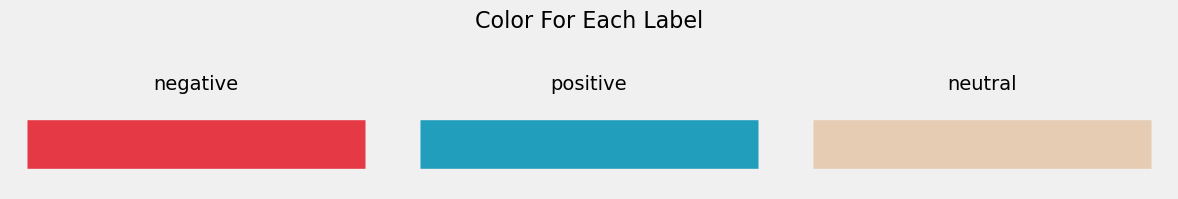

In [144]:
#plot the figure format
plt.figure(figsize=(12,2))
plt.suptitle('Color For Each Label', y = 1, fontsize = 16)
a, b, c = 1, 3, 1   # rows, columns, counter

#plot each color
for x in colorused:
    plt.subplot(a, b, c)  # row, column, counter
    plt.axis('off')
    plt.title(x, fontsize = 14)
    plt.hlines(0,0,10, color = colorused[x] ,linestyles = 'solid', linewidth = 35)
    c = c + 1

plt.tight_layout()
plt.show()

In [162]:
sentiment_masyarakat = pd.DataFrame(tweet_df['Sentiment'].value_counts())
max_index = sentiment_masyarakat['Sentiment'].idxmax()
max_index = sentiment_masyarakat.index.get_loc(max_index)
print(max_index) 

0


In [164]:
#make the sentiment data to be in dataframe format
sentiment_masyarakat = pd.DataFrame(tweet_df['Sentiment'].value_counts())
sentiment_masyarakat.head()

,Sentiment
negative,2975
neutral,2617
positive,1574


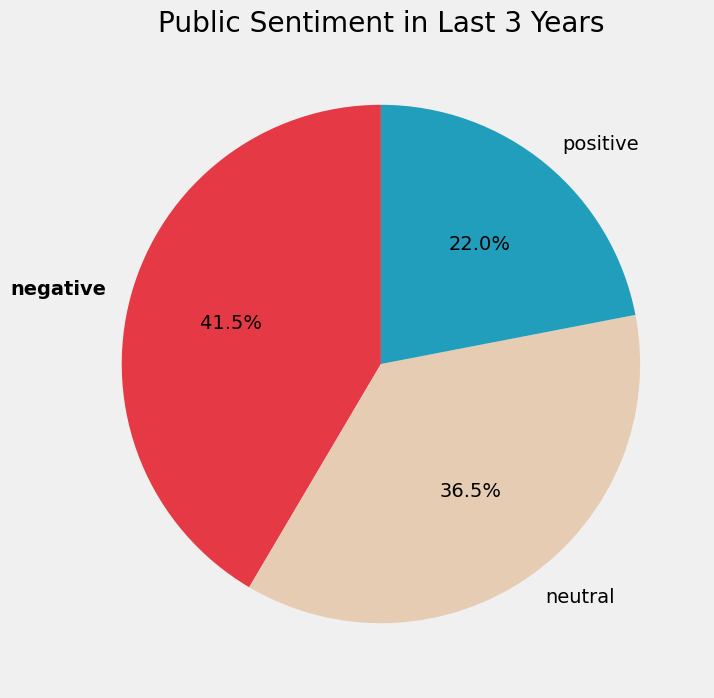

In [167]:
#make the sentiment data to be in dataframe format
sentiment_masyarakat = pd.DataFrame(tweet_df['Sentiment'].value_counts())

#plot the sum of sentiment
fig, ax = plt.subplots(figsize=(10,8))
wedges, labels, autotexts = ax.pie(sentiment_masyarakat['Sentiment'], labels=sentiment_masyarakat.index, autopct='%1.1f%%', shadow=False, startangle=90, colors=[colorused[label] for label in sentiment_masyarakat.index])
max_index = sentiment_masyarakat['Sentiment'].idxmax()
max_index = sentiment_masyarakat.index.get_loc(max_index)
labels[max_index].set_fontweight('bold')

ax.set_title("Public Sentiment in Last 3 Years")
plt.show()

<p>From the pie chart above we can clearly see that the police departemen in Indonesia have mostly negative sentiment from the community which is 41.5% , and the sad part is the positive sentiment is even lower than the neutral sentiment</p>

<h3>Look Down For Each Year</h3>

<p>The reason why I want to look up for each year is to know how the sentiment trends going each year</p>

<p>Here I devide the trend into 3 different years, which are 2020, 2021, and 2022</p>

In [91]:
sentiment2020 = tweet_df.loc[tweet_df['Datetime'] < '2021-01-01']

print("the data separated from {} until {}". format(sentiment2020['Datetime'].min(), sentiment2020['Datetime'].max()))
sentiment2020.head()

the data separated from 2020-01-01 09:25:00+00:00 until 2020-12-31 13:58:20+00:00


,Datetime,Tweet Id,Text,Username,Sentiment,Sentiment Score
5318,2020-12-31 13:58:20+00:00,1344644057880907780,#NurulNonton\nTHE PHARMACIST (2020)\n\nTentang...,helmfulfes,negative,0.606645
5319,2020-12-30 15:11:30+00:00,1344300084314292224,Kinerja polisi di tahun 2020 https://t.co/4vyG...,aryalnazry,neutral,0.996722
5320,2020-12-30 10:34:59+00:00,1344230495027040257,Beginilah kehebatan kinerja polisi yang sebena...,alfinrmdhnn,positive,0.937522
5321,2020-12-30 08:15:02+00:00,1344195274701336578,"Ada Ribuan Kasus Penipuan Online, DPR Pertanya...",GoRiauCom,neutral,0.947778
5322,2020-12-30 03:34:49+00:00,1344124756002394113,6 warga sipil tak bersalah ini di bunuh tanpa ...,HukumDan,negative,0.998996


In [150]:
sentiment2021 = tweet_df.loc[tweet_df['Datetime'] >= '2021-01-01']
sentiment2021 = tweet_df.loc[tweet_df['Datetime'] < '2022-01-01']

print("the data separated from {} until {}". format(sentiment2021['Datetime'].min(), sentiment2021['Datetime'].max()))
sentiment2021.head()

the data separated from 2020-01-01 09:25:00+00:00 until 2021-12-31 23:32:21+00:00


,Datetime,Tweet Id,Text,Username,Sentiment,Sentiment Score
2608,2021-12-31 23:32:21+00:00,1477060085666881537,"@republikaonline Ga efektif, cuma bagi-bagi ja...",JamilulKh,negative,0.986566
2609,2021-12-31 04:21:33+00:00,1476770475757867010,#percumalaporpolisi adalah elspresi kekecewaan...,sobisy,negative,0.641366
2610,2021-12-31 03:53:48+00:00,1476763494326308869,"Kunjungi Polda Jateng, Menhub Apresiasi Kinerj...",AwalMediaN,neutral,0.962179
2611,2021-12-31 03:47:56+00:00,1476762017046269952,@txtdrberseragam Lama² bisa kejadian kyk mexic...,el_saintx,negative,0.998973
2612,2021-12-31 03:39:11+00:00,1476759814428520449,"@evianafs Haha, yg posting juga kayaknya gk mu...",harlanpradana,negative,0.985610


In [151]:
sentiment2022 = tweet_df.loc[tweet_df['Datetime'] >= '2022-01-01']

print("the data separated from {} until {}". format(sentiment2022['Datetime'].min(), sentiment2022['Datetime'].max()))
sentiment2022.head()

the data separated from 2022-01-01 03:31:03+00:00 until 2022-12-29 13:20:01+00:00


,Datetime,Tweet Id,Text,Username,Sentiment,Sentiment Score
0,2022-12-29 13:20:01+00:00,1608452783363231746,"Akhiri 2022, Kapolda Jateng Mohon Maaf jika Ki...",GATRA_com,negative,0.546972
1,2022-12-29 12:10:00+00:00,1608435161426984962,"Gelar Konferensi Pers, Berikut Capaian Kinerja...",TerentangPolisi,neutral,0.918845
2,2022-12-28 23:54:24+00:00,1608250040610607107,"@NarasiNewsroom polisi kontol, yang lu benerin...",Malvin4you,negative,0.999030
3,2022-12-28 12:53:47+00:00,1608083791117180930,"Dialog papa Al ""Polisi ngk bisa nyari!!!!"" Lah...",NasirChya,negative,0.959421
4,2022-12-27 14:44:05+00:00,1607749160824111105,Pertahankan pencapaian Terbaik Melayani Masyar...,NumberthreeT,positive,0.995242


<p>Now I can seperately printout the piechart for each year</p>

Text(0.5, 1.0, 'Public Sentiment in 2022')

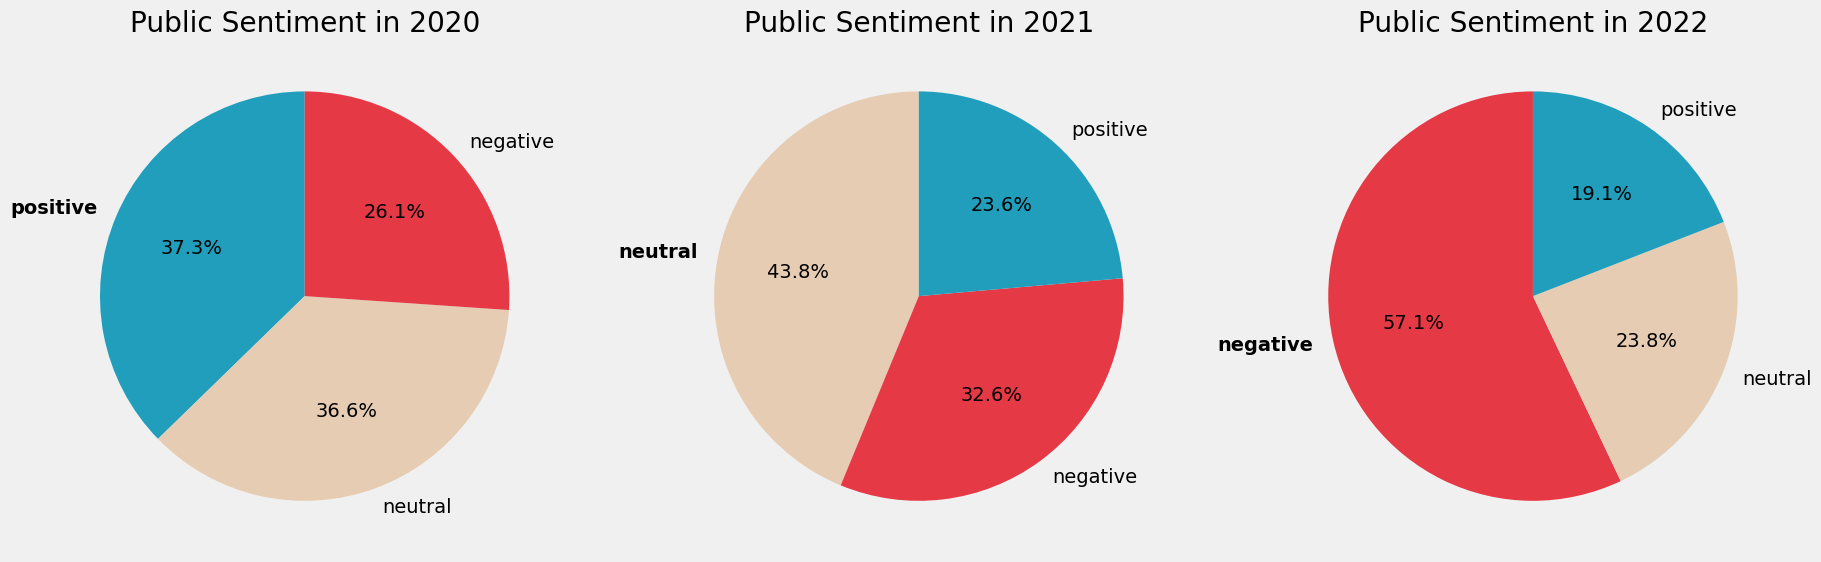

In [170]:
#make all the sentiment data to be datarfame format
sentimentmasy2020 = pd.DataFrame(sentiment2020['Sentiment'].value_counts())
sentimentmasy2021 = pd.DataFrame(sentiment2021['Sentiment'].value_counts())
sentimentmasy2022 = pd.DataFrame(sentiment2022['Sentiment'].value_counts())


# create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20, 20))

# plot the first set of data on the first subplot
wedges, labels, autotexts = ax1.pie(sentimentmasy2020['Sentiment'], labels=sentimentmasy2020.index, autopct='%1.1f%%', shadow=False, startangle=90, colors=[colorused[label] for label in sentimentmasy2020.index])
max_index = sentimentmasy2020['Sentiment'].idxmax()
max_index = sentimentmasy2020.index.get_loc(max_index)
labels[max_index].set_fontweight('bold')
ax1.set_title("Public Sentiment in 2020")

# plot the second set of data on the second subplot
wedges, labels, autotexts = ax2.pie(sentimentmasy2021['Sentiment'], labels=sentimentmasy2021.index, autopct='%1.1f%%', shadow=False, startangle=90, colors=[colorused[label] for label in sentimentmasy2021.index])
max_index = sentimentmasy2021['Sentiment'].idxmax()
max_index = sentimentmasy2021.index.get_loc(max_index)
labels[max_index].set_fontweight('bold')
ax2.set_title("Public Sentiment in 2021")

# plot the third set of data on the third subplot
wedges, labels, autotexts = ax3.pie(sentimentmasy2022['Sentiment'], labels=sentimentmasy2022.index, autopct='%1.1f%%', shadow=False, startangle=90, colors=[colorused[label] for label in sentimentmasy2022.index])
max_index = sentimentmasy2022['Sentiment'].idxmax()
max_index = sentimentmasy2022.index.get_loc(max_index)
labels[max_index].set_fontweight('bold')
ax3.set_title("Public Sentiment in 2022")



<p>From the plot above we can see that the sentiment trend tends to the negative side from 2020 to 2022, with it's peak is at 2022 where the negative sentiment is more than 50% (57.1%) and the positive sentiment is even less than the neutral sentiment</p>